In [49]:
# First let's import the needed libraries

import sys

# Math
import numpy as np

# Data Manipulation
import pandas as pd

# Data Encoding
from collections import defaultdict

# Data visualization
import matplotlib.pyplot as plt

# Encoders and metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

import itertools

#XGBoost
import xgboost as xgb



In [137]:
print(xgb.__version__)

1.3.3


In [51]:
#Read data
df = pd.read_csv('mushroom_data_all.csv')

In [52]:
df.head()

# The data contains a set of categorical variables that describe mushrooms from color and shape of a cap to habitat

,class_edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Attribute Information:

1. class_edible: edible=e, poisonous=p
2. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
3. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
4. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
5. bruises?: bruises=t,no=f
6. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
7. gill-attachment: attached=a,descending=d,free=f,notched=n
8. gill-spacing: close=c,crowded=w,distant=d
9. gill-size: broad=b,narrow=n
10. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
11. stalk-shape: enlarging=e,tapering=t
12. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
13. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
15. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
17. veil-type: partial=p,universal=u
18. veil-color: brown=n,orange=o,white=w,yellow=y
19. ring-number: none=n,one=o,two=t
20. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
21. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
22. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
23. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [53]:
df.describe().transpose()

,count,unique,top,freq
class_edible,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [54]:
columns = ['class_edible', 'cap-shape', 'cap-surface', 'cap-color', 'bruises','odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
           'stalk-shape', 'stalk-root', 'stalk-surface-above-ring','stalk-surface-below-ring', 'stalk-color-above-ring',
           'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number','ring-type', 'spore-print-color', 'population', 'habitat']

In [55]:
# To encode all variables in a safe way, we first save all columns as LabelEncoder dictionary
defDic = defaultdict(preprocessing.LabelEncoder) 

In [56]:
# then safely encode the variables in the original dataset
df = df.apply(lambda x: defDic[x.name].fit_transform(x))

In [57]:
# Now, instead of letters we have integers as categories
df.head()

,class_edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [58]:
# and defDic is a dictionary of LabelEncoders for each column
defDic

defaultdict(sklearn.preprocessing._label.LabelEncoder,
            {'class_edible': LabelEncoder(),
             'cap-shape': LabelEncoder(),
             'cap-surface': LabelEncoder(),
             'cap-color': LabelEncoder(),
             'bruises': LabelEncoder(),
             'odor': LabelEncoder(),
             'gill-attachment': LabelEncoder(),
             'gill-spacing': LabelEncoder(),
             'gill-size': LabelEncoder(),
             'gill-color': LabelEncoder(),
             'stalk-shape': LabelEncoder(),
             'stalk-root': LabelEncoder(),
             'stalk-surface-above-ring': LabelEncoder(),
             'stalk-surface-below-ring': LabelEncoder(),
             'stalk-color-above-ring': LabelEncoder(),
             'stalk-color-below-ring': LabelEncoder(),
             'veil-type': LabelEncoder(),
             'veil-color': LabelEncoder(),
             'ring-number': LabelEncoder(),
             'ring-type': LabelEncoder(),
             'spore-print-color': L

In [59]:
#All attributes are saved and can be obtained by .classes_
defDic['cap-color'].classes_

array(['b', 'c', 'e', 'g', 'n', 'p', 'r', 'u', 'w', 'y'], dtype=object)

In [60]:
for key in defDic.keys():
    print(key, defDic[key].classes_)

class_edible ['e' 'p']
cap-shape ['b' 'c' 'f' 'k' 's' 'x']
cap-surface ['f' 'g' 's' 'y']
cap-color ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises ['f' 't']
odor ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-attachment ['a' 'f']
gill-spacing ['c' 'w']
gill-size ['b' 'n']
gill-color ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk-shape ['e' 't']
stalk-root ['?' 'b' 'c' 'e' 'r']
stalk-surface-above-ring ['f' 'k' 's' 'y']
stalk-surface-below-ring ['f' 'k' 's' 'y']
stalk-color-above-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
stalk-color-below-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil-type ['p']
veil-color ['n' 'o' 'w' 'y']
ring-number ['n' 'o' 't']
ring-type ['e' 'f' 'l' 'n' 'p']
spore-print-color ['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
population ['a' 'c' 'n' 's' 'v' 'y']
habitat ['d' 'g' 'l' 'm' 'p' 'u' 'w']


In [61]:
# Let's not write the encoded data over original, instead save it in different file
df.to_csv('encoded_mushrooms_all.csv', index = False)

Now, the full data is ready so we can split it to training and validation datasets (70/30).

In [62]:
# Shuffle data rows
np.random.seed(2020)
lod = list(df.index)
np.random.shuffle(lod)
df = df.iloc[lod]

In [63]:
# Split data
rows = df.shape[0]
train = int(0.7 * rows)
test = rows - train
df[:train].to_csv('mush_train.csv', index = False, index_label = 'Row', header = False, columns = columns)
df[train:].to_csv('mush_validation.csv', index = False, index_label = 'Row', header = False, columns = columns)

In [64]:
#Save list of features
with open('mush_col.txt','w') as f:
    f.write(','.join(columns))

In [65]:
#q1

In [66]:
# Code from iris_xgboost file (define path to data)
column_list_file = 'mush_col.txt'
train_file = 'mush_train.csv'
validation_file = 'mush_validation.csv'

In [67]:
columns = ''
with open(column_list_file,'r') as f:
    columns = f.read().split(',')

In [68]:
columns

['class_edible',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [69]:
df_train = pd.read_csv(train_file, names = columns)
df_validation = pd.read_csv(validation_file, names = columns)

In [70]:
df_validation.head()

,class_edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,5,0,8,0,5,1,1,0,7,...,1,7,7,0,2,2,4,7,2,1
1,1,3,3,4,0,8,1,0,1,0,...,2,6,6,0,2,1,0,7,4,0
2,0,5,0,3,1,5,1,0,0,10,...,2,6,6,0,2,1,4,2,4,0
3,0,2,3,3,1,5,1,0,0,5,...,2,3,3,0,2,1,4,3,5,0
4,0,5,3,9,1,3,1,0,0,2,...,2,7,7,0,2,1,4,3,3,1


In [71]:
# Important Note - ravel() - function for flattening arrays. Has different 'order' for values merging that can be important if we flattering matrix
X_train = df_train.iloc[:,1:]
y_train = df_train.iloc[:,0].ravel()
X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [23]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
# Tuning
# Step 1: start with learning rate [0.05 - 0.3] 
# Step 2: Optimal number of trees
# Step 3: Tune tree-specific parameters - max_depth, min_child_weight, gamma, subsample, colsample_bytree
# Step 4: Model shrinkage. Tune regularization parameters - lambda, alpha
# Step 5: Play with learning rate


In [72]:
#Step 1: Start with 

X_train,
y_train,
eval_set = [(X_train, y_train), (X_validation, y_validation)],
eval_metric=['logloss'],
early_stopping_rounds=10

In [130]:
def modelfit(alg, X_train, y_train, X_validation, y_validation, useTrainCV=True, cv_folds=5, early_stopping_rounds=10):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train, label=y_train)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='logloss', early_stopping_rounds=early_stopping_rounds, verbose_eval = 1)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_validation, y_validation)],eval_metric='logloss')
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    #Predict validation set:
    dvalid_predictions = alg.predict(X_validation)
    dvalid_predprob = alg.predict_proba(X_validation)[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(y_train, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [74]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV

In [75]:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=None,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, monotone_constraints=None,
              n_estimators=100, n_jobs=1, nthread=None, num_parallel_tree=None,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, tree_method=None,
              validate_parameters=None, verbosity=1)

In [76]:
xgb1 = XGBClassifier(learning_rate =0.1,
 n_estimators=100,
 max_depth=5,
 use_label_encoder=False,
 min_child_weight=1,
 gamma=0,
 random_state=0, reg_alpha=0,
 subsample=1,
 silent=None,
 colsample_bylevel=1,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=2020,
 verbosity=1)
modelfit(xgb1, X_train, y_train, X_validation, y_validation)

[0]	validation_0-logloss:0.60174	validation_1-logloss:0.60238
[1]	validation_0-logloss:0.52839	validation_1-logloss:0.52911
[2]	validation_0-logloss:0.46725	validation_1-logloss:0.46764
[3]	validation_0-logloss:0.41478	validation_1-logloss:0.41541
[4]	validation_0-logloss:0.37018	validation_1-logloss:0.37091
[5]	validation_0-logloss:0.32830	validation_1-logloss:0.32873
[6]	validation_0-logloss:0.29397	validation_1-logloss:0.29491
[7]	validation_0-logloss:0.26494	validation_1-logloss:0.26577
[8]	validation_0-logloss:0.23941	validation_1-logloss:0.24031
[9]	validation_0-logloss:0.21848	validation_1-logloss:0.21979
[10]	validation_0-logloss:0.19551	validation_1-logloss:0.19650
[11]	validation_0-logloss:0.17777	validation_1-logloss:0.17868
[12]	validation_0-logloss:0.15979	validation_1-logloss:0.16057
[13]	validation_0-logloss:0.14472	validation_1-logloss:0.14530
[14]	validation_0-logloss:0.13228	validation_1-logloss:0.13293
[15]	validation_0-logloss:0.12032	validation_1-logloss:0.12080
[1

In [77]:
classifier = xgb.XGBClassifier (objective='binary:logistic',use_label_encoder=False)

In [78]:
classifier.fit(X_train,
               y_train,
               eval_set = [(X_train, y_train), (X_validation, y_validation)], 
               eval_metric=['logloss'])

[0]	validation_0-logloss:0.44431	validation_1-logloss:0.44472
[1]	validation_0-logloss:0.30277	validation_1-logloss:0.30290
[2]	validation_0-logloss:0.21446	validation_1-logloss:0.21466
[3]	validation_0-logloss:0.15434	validation_1-logloss:0.15444
[4]	validation_0-logloss:0.11322	validation_1-logloss:0.11300
[5]	validation_0-logloss:0.08349	validation_1-logloss:0.08326
[6]	validation_0-logloss:0.06227	validation_1-logloss:0.06222
[7]	validation_0-logloss:0.04700	validation_1-logloss:0.04694
[8]	validation_0-logloss:0.03510	validation_1-logloss:0.03513
[9]	validation_0-logloss:0.02681	validation_1-logloss:0.02689
[10]	validation_0-logloss:0.02041	validation_1-logloss:0.02060
[11]	validation_0-logloss:0.01540	validation_1-logloss:0.01556
[12]	validation_0-logloss:0.01218	validation_1-logloss:0.01240
[13]	validation_0-logloss:0.00931	validation_1-logloss:0.00949
[14]	validation_0-logloss:0.00726	validation_1-logloss:0.00741
[15]	validation_0-logloss:0.00573	validation_1-logloss:0.00584
[1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [79]:
eval_result = classifier.evals_result()

In [80]:
training_rounds = range(len(eval_result['validation_0']['logloss']))

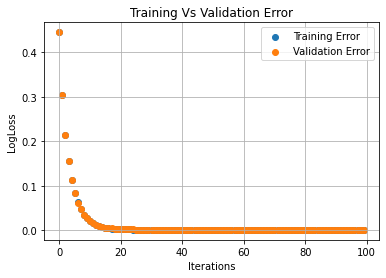

In [81]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['logloss'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['logloss'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('LogLoss')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

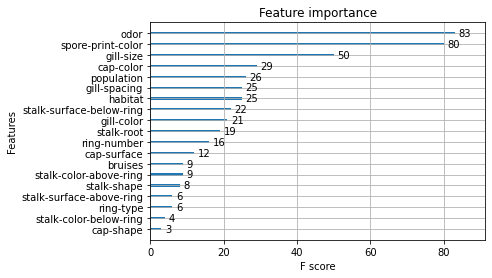

In [82]:
xgb.plot_importance(classifier)
plt.show()

In [96]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=100, 
                                                   gamma=0, subsample=0.8, colsample_bytree=0.8, 
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=2020, use_label_encoder=False), 
                        param_grid = param_test1, scoring='accuracy',n_jobs=4, cv=5)
gsearch1.fit(X_train,
               y_train,
               eval_set = [(X_train, y_train), (X_validation, y_validation)], 
               eval_metric=['logloss'])
#gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

[0]	validation_0-logloss:0.61278	validation_1-logloss:0.61256
[1]	validation_0-logloss:0.53784	validation_1-logloss:0.53802
[2]	validation_0-logloss:0.48065	validation_1-logloss:0.48062
[3]	validation_0-logloss:0.43237	validation_1-logloss:0.43217
[4]	validation_0-logloss:0.39263	validation_1-logloss:0.39287
[5]	validation_0-logloss:0.35674	validation_1-logloss:0.35712
[6]	validation_0-logloss:0.32219	validation_1-logloss:0.32335
[7]	validation_0-logloss:0.29243	validation_1-logloss:0.29431
[8]	validation_0-logloss:0.27083	validation_1-logloss:0.27341
[9]	validation_0-logloss:0.25012	validation_1-logloss:0.25301
[10]	validation_0-logloss:0.23121	validation_1-logloss:0.23425
[11]	validation_0-logloss:0.21476	validation_1-logloss:0.21785
[12]	validation_0-logloss:0.20049	validation_1-logloss:0.20411
[13]	validation_0-logloss:0.18695	validation_1-logloss:0.19101
[14]	validation_0-logloss:0.17265	validation_1-logloss:0.17690
[15]	validation_0-logloss:0.15835	validation_1-logloss:0.16293
[1

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=2020,
                                     subsample=0.8, tree

In [108]:
print(gsearch1.best_params_, gsearch1.best_score_)

{'max_depth': 3, 'min_child_weight': 1} 1.0


In [95]:
# Tuning
# Step 1: start with learning rate [0.05 - 0.3] 
# Step 2: Optimal number of trees
# Step 3: Tune tree-specific parameters - max_depth, min_child_weight, gamma (trained - 0), subsample, colsample_bytree
# Step 4: Model shrinkage. Tune regularization parameters - lambda, alpha
# Step 5: Play with learning rate

In [110]:
param_test2 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=100, max_depth=3, 
                                                  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, 
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=2020, use_label_encoder=False), 
                        param_grid = param_test2, scoring='accuracy',n_jobs=4, cv=5)
gsearch2.fit(X_train,
               y_train,
               eval_set = [(X_train, y_train), (X_validation, y_validation)], 
               eval_metric=['logloss'], verbose = 0)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=3, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=2020,
                                     subsample=0.8, tree_metho

In [115]:
print(gsearch2.best_params_, gsearch2.best_score_)

{'gamma': 0.0} 1.0


In [114]:
param_test3 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=100, max_depth=3, gamma = 0,
                                                  min_child_weight=1, subsample=0.8, colsample_bytree=0.8, 
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=2020, use_label_encoder=False), 
                        param_grid = param_test3, scoring='accuracy',n_jobs=4, cv=5)
gsearch3.fit(X_train,
               y_train,
               eval_set = [(X_train, y_train), (X_validation, y_validation)], 
               eval_metric=['logloss'], verbose = 0)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=3, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=2020,
                                     subsample=0.8, tree_metho

In [116]:
print(gsearch3.best_params_, gsearch3.best_score_)

{'colsample_bytree': 0.6, 'subsample': 0.7} 1.0


In [125]:
param_test4 = {
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=100, max_depth=3, gamma = 0,
                                                  min_child_weight=1, subsample=0.7, colsample_bytree=0.6, 
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=2020, use_label_encoder=False), 
                        param_grid = param_test4, scoring='accuracy',n_jobs=4, cv=5)
gsearch4.fit(X_train,
               y_train,
               eval_set = [(X_train, y_train), (X_validation, y_validation)], 
               eval_metric=['logloss'], verbose = 0)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.6, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=3, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=2020,
                                     subsample=0.7, tree_metho

In [126]:
print(gsearch4.best_params_, gsearch4.best_score_)

{'reg_alpha': 0} 1.0


In [128]:
xgb4 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=100,
 max_depth=3,
 min_child_weight=1,
 gamma=0,
 subsample=0.7,
 colsample_bytree=0.6,
 reg_alpha=0,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=2020, use_label_encoder=False)

In [ ]:
def modelfit(alg, X_train, y_train, X_validation, y_validation, useTrainCV=True, cv_folds=5, early_stopping_rounds=10):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train, label=y_train)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='logloss', early_stopping_rounds=early_stopping_rounds, verbose_eval = 1)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_validation, y_validation)],eval_metric='logloss')
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    #Predict validation set:
    dvalid_predictions = alg.predict(X_validation)
    dvalid_predprob = alg.predict_proba(X_validation)[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(y_train, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))

    
    xgb.plot_importance(alg,)
    plt.ylabel('Feature Importance Score')
    plt.show()
    

In [131]:
modelfit(xgb4, X_train, y_train, X_validation, y_validation)

[0]	validation_0-logloss:0.68409	validation_1-logloss:0.68420
[1]	validation_0-logloss:0.67492	validation_1-logloss:0.67507
[2]	validation_0-logloss:0.66675	validation_1-logloss:0.66696
[3]	validation_0-logloss:0.65925	validation_1-logloss:0.65938
[4]	validation_0-logloss:0.65224	validation_1-logloss:0.65241
[5]	validation_0-logloss:0.64453	validation_1-logloss:0.64468
[6]	validation_0-logloss:0.63636	validation_1-logloss:0.63663
[7]	validation_0-logloss:0.63014	validation_1-logloss:0.63056
[8]	validation_0-logloss:0.62272	validation_1-logloss:0.62322
[9]	validation_0-logloss:0.61564	validation_1-logloss:0.61613
[10]	validation_0-logloss:0.60944	validation_1-logloss:0.61009
[11]	validation_0-logloss:0.60189	validation_1-logloss:0.60256
[12]	validation_0-logloss:0.59451	validation_1-logloss:0.59528
[13]	validation_0-logloss:0.58744	validation_1-logloss:0.58819
[14]	validation_0-logloss:0.58133	validation_1-logloss:0.58209
[15]	validation_0-logloss:0.57497	validation_1-logloss:0.57572
[1

TypeError: 'NoneType' object is not callable

AttributeError: 'XGBClassifier' object has no attribute 'Booster'

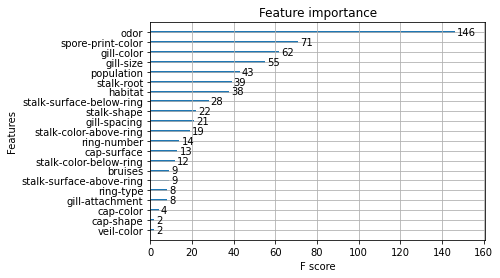